In [ ]:
#https://medium.com/@nafiseramezani1985/fuzzy-c-means-clustering-f9e047e4e458

In [13]:
import skfuzzy as fuzz
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from fcmeans import FCM

In [5]:
data = pd.read_csv('data1.csv')

In [25]:
X_y = data[['X', 'Y', 'Class']]
X = X_y[['X', 'Y']]

scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

data[['X', 'Y']] = X_normalized
print(data)

            X         Y  Class
0   -0.813747 -0.357511      1
1   -0.126986  0.998022      1
2   -0.725701 -0.402696      1
3    0.418901  0.998022      0
4   -0.813747 -0.673802      1
..        ...       ...    ...
207  0.457641  0.783396      0
208  0.197024  0.259256      0
209  0.797500  0.390291      0
210  0.830958  0.496475      0
211  1.243014  1.074835      0

[212 rows x 3 columns]


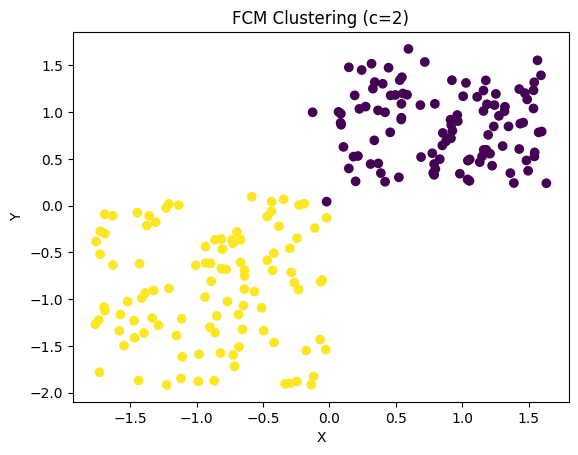

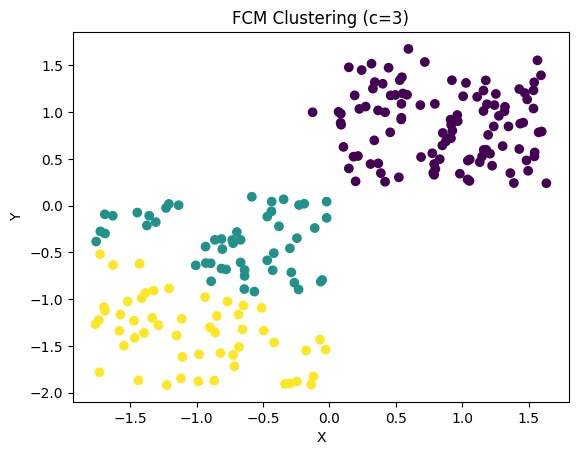

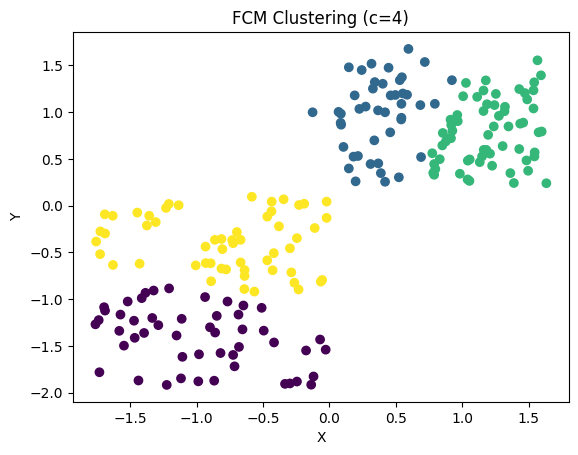

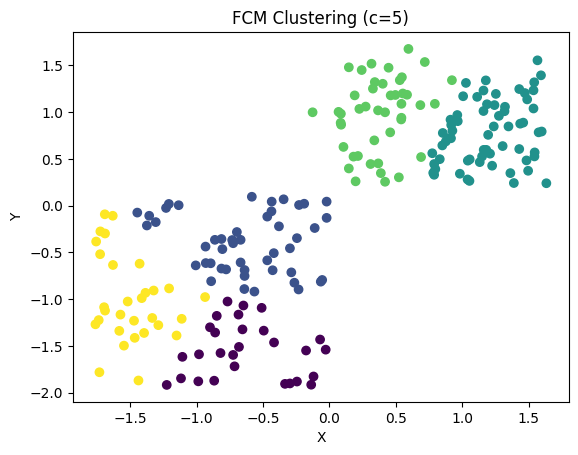

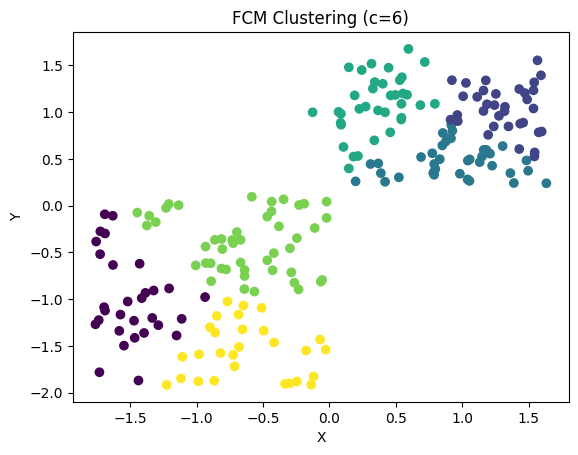

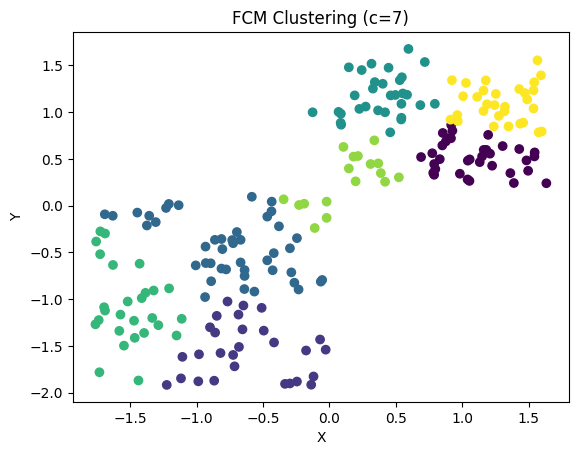

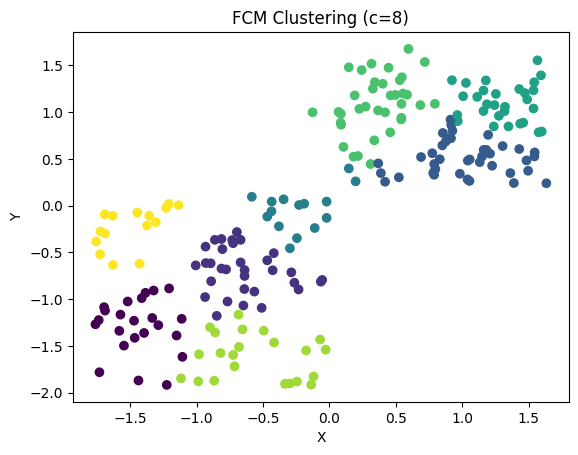

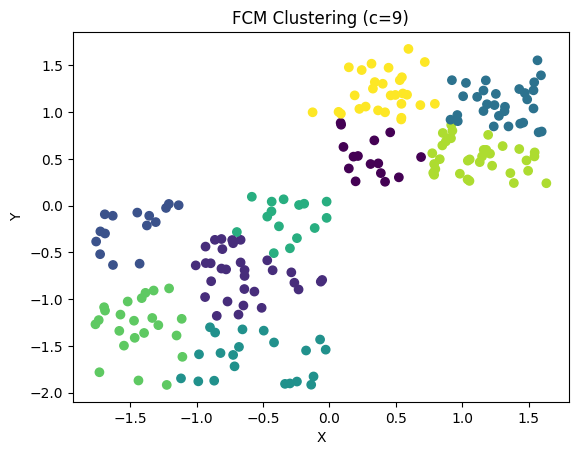

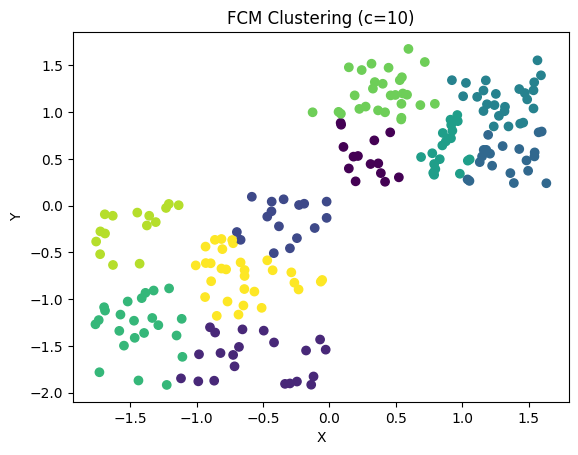

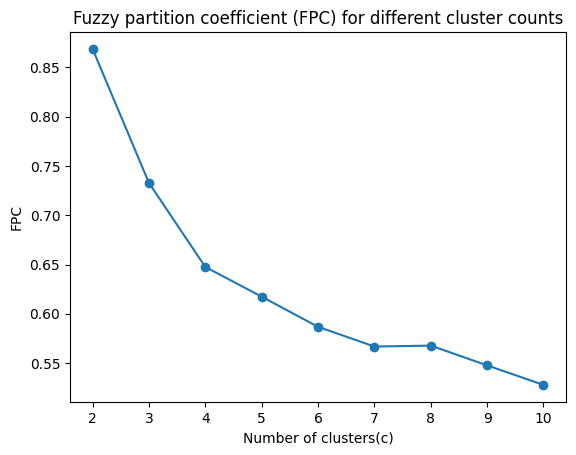

The best number of clusters (c) based on FPC is: 2


In [31]:
fpc_values = []
best_c = 0
best_fpc = -1

def run_fcm_and_plot(X, c):
    global best_c, best_fpc
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(X.T, c, 2, error=0.005, maxiter=1000, init=None)
    cluster_membership = np.argmax(u, axis=0)

    fpc_values.append(fpc)
    
    if fpc > best_fpc:
        best_fpc = fpc
        best_c = c
    
    plt.scatter(X['X'], X['Y'], c=cluster_membership, cmap='viridis')
    
    plt.title(f'FCM Clustering (c={c})')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

for c in range(2, 11):
    run_fcm_and_plot(data[['X', 'Y']], c)

c_values = list(range(2, 11))
plt.plot(c_values, fpc_values, marker="o")
plt.title('Fuzzy partition coefficient (FPC) for different cluster counts')
plt.xlabel('Number of clusters(c)')
plt.ylabel('FPC')
plt.show()

print(f'The best number of clusters (c) based on FPC is: {best_c}')

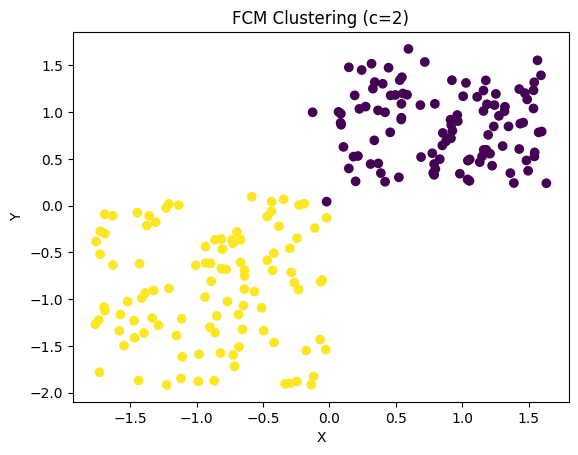

In [36]:
run_fcm_and_plot(data[['X', 'Y']], best_c)


DATA 2


In [33]:
data2 = pd.read_csv('data2.csv')

X_y = data2[['X', 'Y', 'Class']]
X = X_y[['X', 'Y']]

scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

data2[['X', 'Y']] = X_normalized
print(data2)

            X         Y  Class
0   -1.315522  0.649213      0
1    0.141025 -1.323862      1
2   -1.506091  0.064147      0
3   -0.264216  1.289819      1
4    0.417045  1.194334      1
..        ...       ...    ...
295 -0.825294  1.286212      0
296  1.284232  0.146129      1
297 -1.406355 -0.859190      0
298 -0.837684 -0.793684      1
299 -1.482871 -0.394832      0

[300 rows x 3 columns]


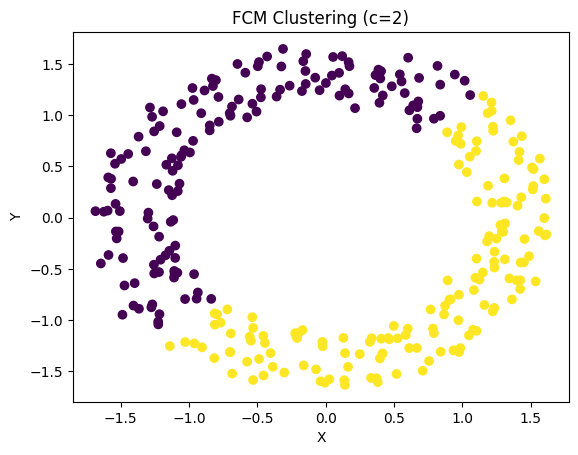

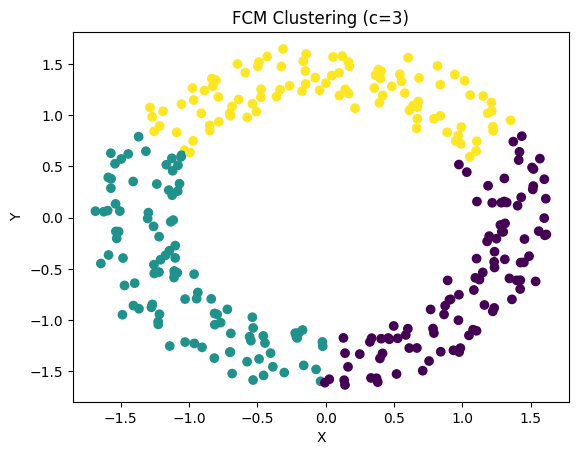

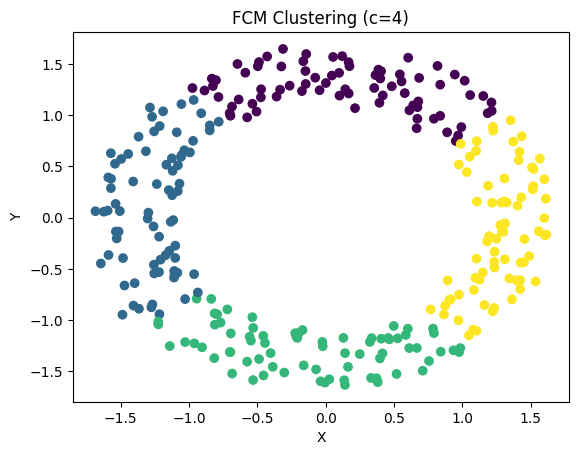

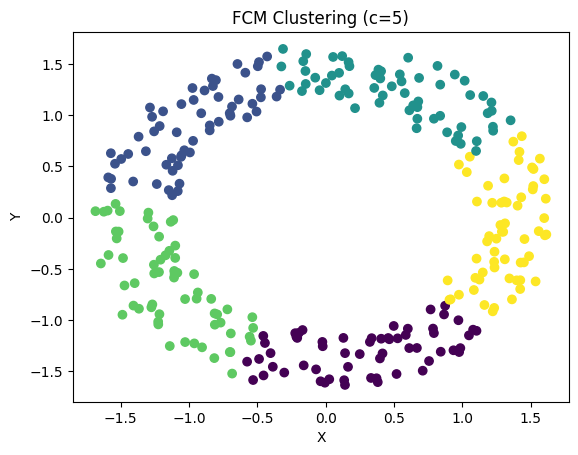

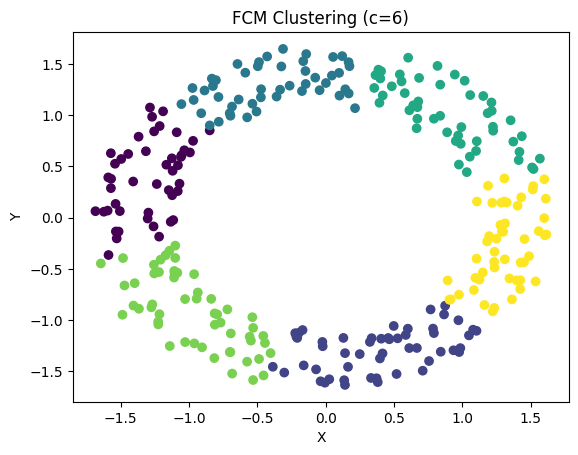

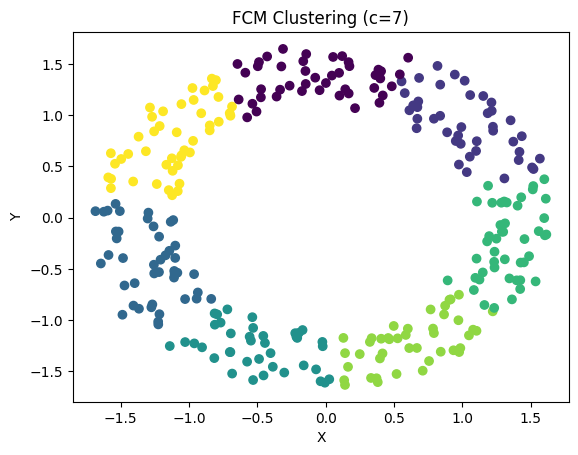

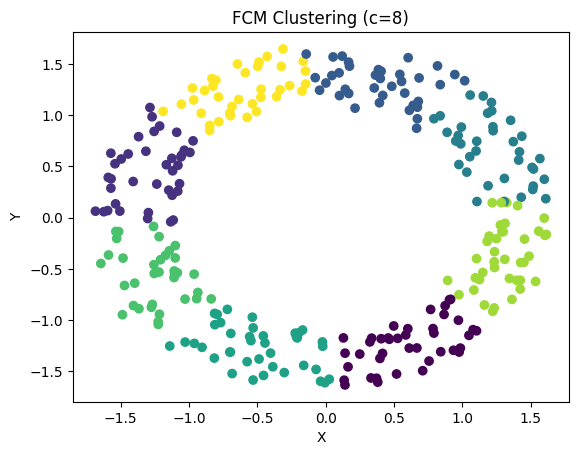

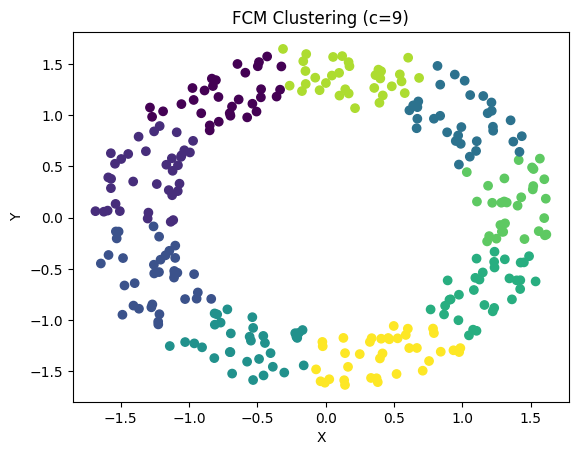

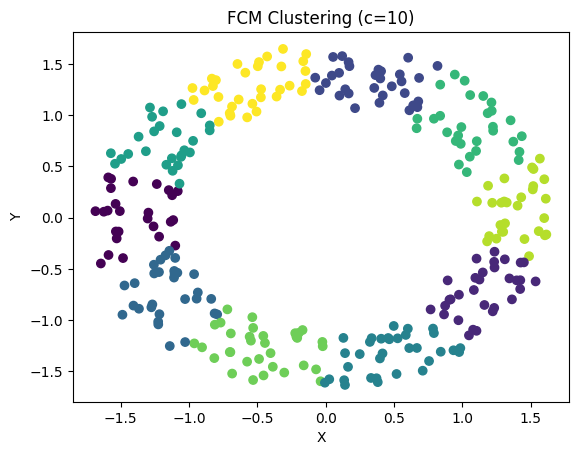

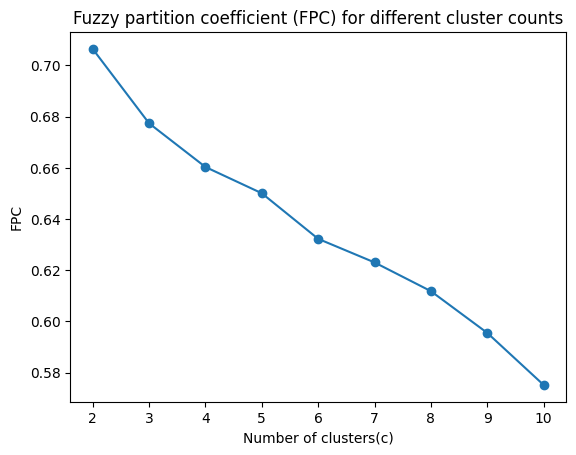

The best number of clusters (c) based on FPC is: 2


In [34]:
fpc_values = []
best_c = 0
best_fpc = -1

def run_fcm_and_plot(X, c):
    global best_c, best_fpc
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(X.T, c, 2, error=0.005, maxiter=1000, init=None)
    cluster_membership = np.argmax(u, axis=0)

    fpc_values.append(fpc)
    
    if fpc > best_fpc:
        best_fpc = fpc
        best_c = c
    
    plt.scatter(X['X'], X['Y'], c=cluster_membership, cmap='viridis')
    
    plt.title(f'FCM Clustering (c={c})')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

for c in range(2, 11):
    run_fcm_and_plot(data2[['X', 'Y']], c)

c_values = list(range(2, 11))
plt.plot(c_values, fpc_values, marker="o")
plt.title('Fuzzy partition coefficient (FPC) for different cluster counts')
plt.xlabel('Number of clusters(c)')
plt.ylabel('FPC')
plt.show()

print(f'The best number of clusters (c) based on FPC is: {best_c}')

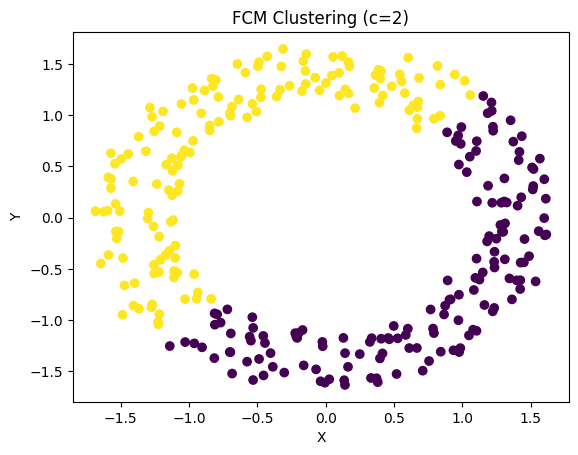

In [37]:
run_fcm_and_plot(data2[['X', 'Y']], best_c)